In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
plt.style.use("ggplot")

# Creating sample data
We create sample data with test results for different ages and heights.

In [3]:
df = pd.DataFrame({
    "age": [25, 28, 31, 49, 25, 51, 58, 71, 25, 21],
    "height": [168, 173, 199, 183, 151, 165, 188, 189, 190, 165],
    "result": [0, 0, 1, 0, 0, 1, 1, 1, 0, 1]
})

x = df["height"].copy()
y = df["result"].copy()

X = np.array(x).reshape(-1, 1)
Y = np.array(y).reshape(-1,1)

prediction = [160 + number for number in range(41)]
Prediction = np.array(prediction).reshape(-1, 1)

# Logistic Regression

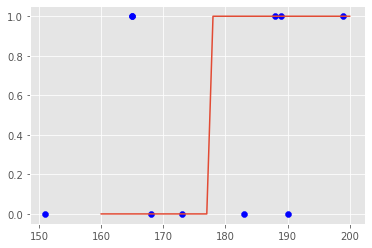

In [4]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X, Y)

plt.scatter(x, y, color = "blue")
plt.plot(prediction, lr.predict(Prediction));

# Decision Tree Classification

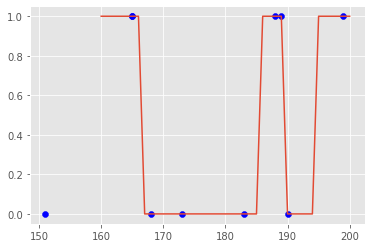

In [7]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier()
clf.fit(X, Y)

plt.scatter(x, y, color = "blue")
plt.plot(prediction, clf.predict(Prediction));

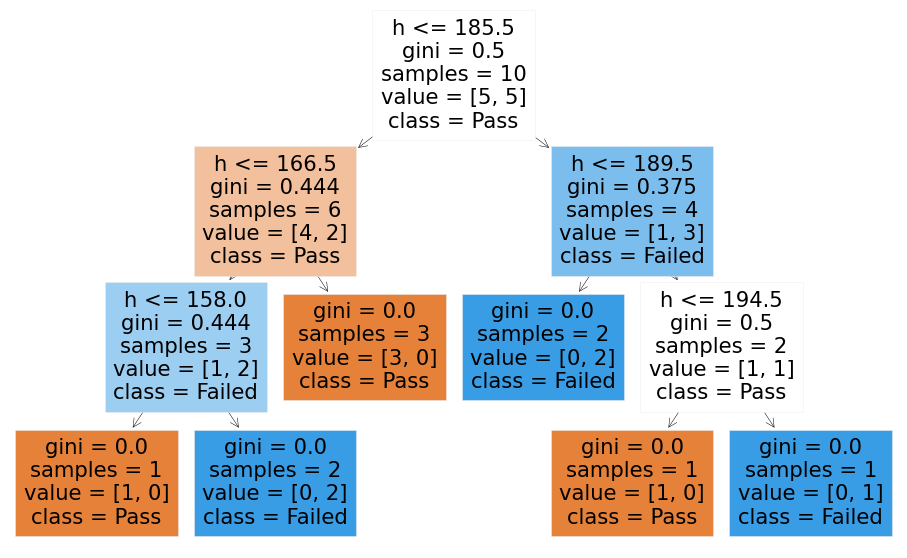

In [19]:
fig, ax = plt.subplots(figsize=(16, 10))
plot_tree(clf, ax = ax, feature_names = "height", class_names = ["Pass", "Failed"], filled = True);
plt.show()